1

In [1]:
import yfinance as yf
import pandas as pd

# Obtener datos de acciones de Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reiniciar el índice y mostrar las primeras 5 filas
tesla_data.reset_index(inplace=True)
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [7]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL de los ingresos de Tesla en Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Configurar headers para evitar bloqueos
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers).text

# Extraer datos con BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Buscar todas las tablas en la página
tables = soup.find_all("table")

# Verificar si hay tablas disponibles
if len(tables) > 0:
    # Intentar extraer la tabla correcta
    for table in tables:
        df = pd.read_html(str(table))[0]
        if "Revenue" in df.columns[1]:  # Verificar si la tabla tiene "Revenue"
            tesla_revenue = df
            tesla_revenue.columns = ["Date", "Revenue"]  # Renombrar columnas
            tesla_revenue.dropna(inplace=True)  # Eliminar valores nulos
            print(tesla_revenue.tail())  # Mostrar últimas 5 filas
            break
    else:
        print("No se encontró la tabla correcta de ingresos de Tesla.")
else:
    print("No se encontraron tablas de ingresos para Tesla.")


    Date Revenue
11  2013  $2,013
12  2012    $413
13  2011    $204
14  2010    $117
15  2009    $112


/tmp/ipykernel_1090/1760382864.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [10]:
# URL de los ingresos de GameStop en Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Configurar headers para evitar bloqueos
html = requests.get(url, headers=headers).text

# Extraer datos con BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Buscar todas las tablas en la página
tables = soup.find_all("table")

# Verificar si hay tablas disponibles
if len(tables) > 0:
    # Intentar extraer la tabla correcta
    for table in tables:
        df = pd.read_html(str(table))[0]
        if "Revenue" in df.columns[1]:  # Verificar si la tabla tiene "Revenue"
            gme_revenue = df
            gme_revenue.columns = ["Date", "Revenue"]  # Renombrar columnas
            gme_revenue.dropna(inplace=True)  # Eliminar valores nulos
            print(gme_revenue.tail())  # Mostrar últimas 5 filas
            break
    else:
        print("No se encontró la tabla correcta de ingresos de GameStop.")
else:
    print("No se encontraron tablas de ingresos para GameStop.")


    Date Revenue
11  2013  $8,887
12  2012  $9,551
13  2011  $9,474
14  2010  $9,078
15  2009  $8,806


/tmp/ipykernel_1090/1340851100.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [13]:
import pandas as pd
from bs4 import BeautifulSoup

html = response.text
soup = BeautifulSoup(html, "html.parser")

# Intentamos encontrar la tabla correcta
tables = soup.find_all("table")
print(f"Se encontraron {len(tables)} tablas.")  # Verificar cuántas tablas hay

for i, table in enumerate(tables):
    df = pd.read_html(str(table))[0]
    print(f"Tabla {i}: {df.head()}")  # Revisar contenido

# Una vez que identifiquemos la tabla correcta, seleccionamos su índice y extraemos los datos
tesla_revenue = pd.read_html(str(tables[1]))[0]  # Ajusta el índice si es necesario
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue.dropna(inplace=True)
print(tesla_revenue.tail())


NameError: name 'response' is not defined

In [14]:
import requests

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    print("Página cargada correctamente.")
else:
    print(f"Error al cargar la página: {response.status_code}")


Página cargada correctamente.


In [15]:
import pandas as pd
from bs4 import BeautifulSoup

html = response.text
soup = BeautifulSoup(html, "html.parser")

# Buscar todas las tablas disponibles
tables = soup.find_all("table")
print(f"Se encontraron {len(tables)} tablas.")

# Si hay tablas, intentamos extraer la que contiene los ingresos
if len(tables) > 0:
    for i, table in enumerate(tables):
        try:
            df = pd.read_html(str(table))[0]
            print(f"Tabla {i}:")
            print(df.head())  # Ver contenido
        except:
            print(f"Error procesando la tabla {i}")

    # Ajusta el índice según la tabla correcta
    tesla_revenue = pd.read_html(str(tables[1]))[0]  # Prueba con otro índice si falla
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue.dropna(inplace=True)
    print(tesla_revenue.tail())
else:
    print("No se encontraron tablas en la página.")


Se encontraron 6 tablas.
Tabla 0:
   Tesla Annual Revenue (Millions of US $)  \
0                                     2024   
1                                     2023   
2                                     2022   
3                                     2021   
4                                     2020   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $97,690  
1                                   $96,773  
2                                   $81,462  
3                                   $53,823  
4                                   $31,536  
Tabla 1:
  Tesla Quarterly Revenue (Millions of US $)  \
0                                 2024-12-31   
1                                 2024-09-30   
2                                 2024-06-30   
3                                 2024-03-31   
4                                 2023-12-31   

  Tesla Quarterly Revenue (Millions of US $).1  
0                                      $25,707  
1                

/tmp/ipykernel_1090/322582887.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/tmp/ipykernel_1090/322582887.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/tmp/ipykernel_1090/322582887.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/tmp/ipykernel_1090/322582887.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/tmp/ipykernel_1090/322582887.py:15:

2

In [17]:
import yfinance as yf

# Descargar los datos financieros de Tesla
tesla = yf.Ticker("TSLA")

# Obtener el estado financiero (Ingresos y Ganancias)
tesla_financials = tesla.financials.T  # Transponemos para mejor visualización
tesla_revenue = tesla_financials["Total Revenue"]
tesla_revenue = tesla_revenue.reset_index()
tesla_revenue.columns = ["Date", "Revenue"]

# Mostrar resultados
print(tesla_revenue)



        Date        Revenue
0 2024-12-31  97690000000.0
1 2023-12-31  96773000000.0
2 2022-12-31  81462000000.0
3 2021-12-31  53823000000.0
4 2020-12-31            NaN


3

In [3]:
# Obtener datos de acciones de GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reiniciar el índice y mostrar las primeras 5 filas
gme_data.reset_index(inplace=True)
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607505   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


4

In [18]:
# Descargar los datos financieros de GameStop
gamestop = yf.Ticker("GME")

# Obtener el estado financiero (Ingresos y Ganancias)
gamestop_financials = gamestop.financials.T
gamestop_revenue = gamestop_financials["Total Revenue"]
gamestop_revenue = gamestop_revenue.reset_index()
gamestop_revenue.columns = ["Date", "Revenue"]

# Mostrar resultados
print(gamestop_revenue)



        Date       Revenue
0 2024-01-31  5272800000.0
1 2023-01-31  5927200000.0
2 2022-01-31  6010700000.0
3 2021-01-31  5089800000.0


5

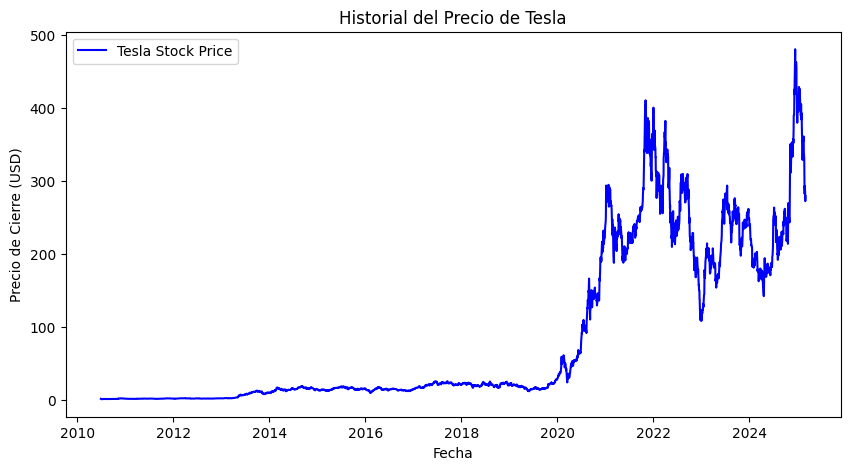

In [5]:
import matplotlib.pyplot as plt

# Gráfico de precios de Tesla
plt.figure(figsize=(10, 5))
plt.plot(tesla_data["Date"], tesla_data["Close"], label="Tesla Stock Price", color="blue")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre (USD)")
plt.title("Historial del Precio de Tesla")
plt.legend()
plt.show()


6

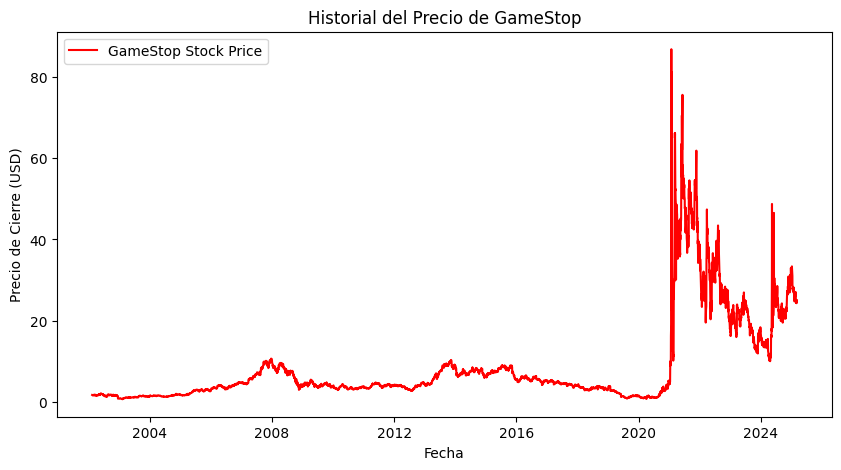

In [6]:
# Gráfico de precios de GameStop
plt.figure(figsize=(10, 5))
plt.plot(gme_data["Date"], gme_data["Close"], label="GameStop Stock Price", color="red")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre (USD)")
plt.title("Historial del Precio de GameStop")
plt.legend()
plt.show()
